<div style="justify-content: center">
<img src="https://openclipart.org/image/800px/307818" width="50"/>
</div>

# Bank Client Anlysis
***Developed By:*** Marx Maciel Xavier

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

path = os.environ['USERPROFILE']
path

'C:\\Users\\marx'

In [54]:
#Importing excel documents
customer = pd.read_excel(path + '\\Bank\\data\\CustomerProd.xlsx')
product_id = pd.read_excel(path + '\\Bank\\data\\Product.xlsx')

In [55]:
customer.head()

,TradeID,TradeDate,Country,Status,Prod_ID,CustomerID,Amount_USD
0,1003297,2022-01-09,USA,ACTIVE,4,200273,1.226371e+06
1,1003554,2022-02-06,USA,ACTIVE,9,200272,1.625861e+06
2,1002535,2022-07-28,USA,ACTIVE,4,200271,5.138862e+05
3,1003181,2022-07-24,USA,ACTIVE,3,200267,1.268838e+06
4,1003337,2022-07-24,USA,ACTIVE,3,200268,1.851589e+05


### Data Preparation

In [56]:
customer.info() 
customer_clean = customer.dropna() #Creating a dataframe without null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TradeID     4999 non-null   int64         
 1   TradeDate   4999 non-null   datetime64[ns]
 2   Country     4999 non-null   object        
 3   Status      4999 non-null   object        
 4   Prod_ID     4960 non-null   object        
 5   CustomerID  4999 non-null   int64         
 6   Amount_USD  4999 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 273.5+ KB


In [57]:
#Printing some data about the customer dataframe

print(customer_clean.info())
print("______________________________")
print(customer_clean['Country'].value_counts())
print("Total = " + str(customer_clean['Country'].value_counts().sum()))
print("______________________________")
print(customer_clean['Status'].value_counts())
print("______________________________")
print("Data colected from :" + str(customer_clean['TradeDate'].min()) + " to " + str(customer_clean['TradeDate'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TradeID     4960 non-null   int64         
 1   TradeDate   4960 non-null   datetime64[ns]
 2   Country     4960 non-null   object        
 3   Status      4960 non-null   object        
 4   Prod_ID     4960 non-null   object        
 5   CustomerID  4960 non-null   int64         
 6   Amount_USD  4960 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 310.0+ KB
None
______________________________
USA    2626
BRA    1399
MEX     523
GBR     412
Name: Country, dtype: int64
Total = 4960
______________________________
ACTIVE    4960
Name: Status, dtype: int64
______________________________
Data colected from :2018-01-06 00:00:00 to 2022-12-28 00:00:00


In [58]:
product_id #the product dataframe doesnt need adjustments

,Prod_ID,Prod_Desc
0,1,DevCommodities
1,2,CambioSpot
2,3,CambioFX
3,4,IR_SWAP
4,5,Futuros
5,6,BONDS
6,7,FX_NDF
7,8,IR_SWAP_Exotic
8,9,IR_SWAP_OP
9,10,Credit


In [59]:
customer_final = pd.merge(customer_clean,
                         product_id[['Prod_ID', 'Prod_Desc']],
                         on="Prod_ID")

In [60]:
customer_final.info() #The final customer dataframe is missing 9 values!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4951 entries, 0 to 4950
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TradeID     4951 non-null   int64         
 1   TradeDate   4951 non-null   datetime64[ns]
 2   Country     4951 non-null   object        
 3   Status      4951 non-null   object        
 4   Prod_ID     4951 non-null   object        
 5   CustomerID  4951 non-null   int64         
 6   Amount_USD  4951 non-null   float64       
 7   Prod_Desc   4951 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 348.1+ KB


In [61]:
customer_clean['Prod_ID'].value_counts()

1                 1767
2                 1467
3                  554
4                  512
5                  232
6                  156
7                  126
8                   66
9                   62
10                   9
DevCommodities       7
CambioSpot           1
CambioFX             1
Name: Prod_ID, dtype: int64

In [62]:
temp = product_id.set_index('Prod_Desc')

In [63]:
dic = temp['Prod_ID'].to_dict()
#dict = {v: k for k, v in dict.items()}
dic

{'DevCommodities': 1,
 'CambioSpot': 2,
 'CambioFX': 3,
 'IR_SWAP': 4,
 'Futuros': 5,
 'BONDS': 6,
 'FX_NDF': 7,
 'IR_SWAP_Exotic': 8,
 'IR_SWAP_OP': 9,
 'Credit': 10}

In [64]:
#Created a dictionary to replace the values that were missaligned in the column
customer_cleaner = customer_clean.replace({"Prod_ID": dic}) 

In [65]:
customer_final = pd.merge(customer_cleaner,
                         product_id[['Prod_ID', 'Prod_Desc']],
                         on="Prod_ID")

In [66]:
customer_final #All the rows are now here

,TradeID,TradeDate,Country,Status,Prod_ID,CustomerID,Amount_USD,Prod_Desc
0,1003297,2022-01-09,USA,ACTIVE,4,200273,1.226371e+06,IR_SWAP
1,1002535,2022-07-28,USA,ACTIVE,4,200271,5.138862e+05,IR_SWAP
2,1004466,2018-03-03,MEX,ACTIVE,4,500080,5.593270e+05,IR_SWAP
3,1004841,2018-04-21,MEX,ACTIVE,4,500078,2.050922e+06,IR_SWAP
4,1002749,2022-03-07,USA,ACTIVE,4,200240,5.507343e+05,IR_SWAP
...,...,...,...,...,...,...,...,...
4955,1004868,2018-10-10,MEX,ACTIVE,10,500083,7.385315e+05,Credit
4956,1003660,2018-11-06,USA,ACTIVE,10,200288,2.088143e+06,Credit
4957,1003949,2022-02-08,USA,ACTIVE,10,200288,1.335561e+06,Credit
4958,1002852,2022-05-30,USA,ACTIVE,10,200234,5.039955e+05,Credit


### Data Visualization

In [67]:
import plotly.express as px
import plotly.io as pio
import plotly as py
import plotly.graph_objs as go
pio.templates.default = "plotly_dark"

In [68]:
prod_revenue = customer_final[['Prod_Desc','Amount_USD']].groupby('Prod_Desc').sum().sort_values(by='Amount_USD',ascending=False).reset_index()
print(prod_revenue.iloc[[prod_revenue['Amount_USD'].idxmax()]])
print(prod_revenue.iloc[[prod_revenue['Amount_USD'].idxmin()]])
prod_revenue

        Prod_Desc    Amount_USD
0  DevCommodities  1.985289e+09
  Prod_Desc    Amount_USD
9    Credit  9.826859e+06


,Prod_Desc,Amount_USD
0,DevCommodities,1.985289e+09
1,CambioSpot,1.598808e+09
2,CambioFX,6.053345e+08
3,IR_SWAP,5.582454e+08
4,Futuros,2.554948e+08
5,BONDS,1.817057e+08
6,FX_NDF,1.438058e+08
7,IR_SWAP_Exotic,7.062934e+07
8,IR_SWAP_OP,6.444740e+07
9,Credit,9.826859e+06


In [69]:
px.bar(prod_revenue, x='Prod_Desc', y= 'Amount_USD', title="Revenue per Product", labels={'Amount_USD':'Amount in USD', 'Prod_Desc': 'Product'})

In [70]:
prod_quantity = customer_final[['Prod_Desc']].value_counts().reset_index().rename(columns = {0:'Quantity'})
print(prod_quantity.iloc[[prod_quantity['Quantity'].idxmax()]])
print(prod_quantity.iloc[[prod_quantity['Quantity'].idxmin()]])
prod_quantity

        Prod_Desc  Quantity
0  DevCommodities      1774
  Prod_Desc  Quantity
9    Credit         9


,Prod_Desc,Quantity
0,DevCommodities,1774
1,CambioSpot,1468
2,CambioFX,555
3,IR_SWAP,512
4,Futuros,232
5,BONDS,156
6,FX_NDF,126
7,IR_SWAP_Exotic,66
8,IR_SWAP_OP,62
9,Credit,9


In [71]:
px.bar(prod_quantity, x='Prod_Desc', y= 'Quantity', title="Count per Product", labels={'Prod_Desc': 'Product'})

In [72]:
customer_value = customer_final[['CustomerID','Amount_USD']].groupby('CustomerID').sum().sort_values(by='Amount_USD',ascending=False).reset_index()
print(customer_value.iloc[[customer_value['Amount_USD'].idxmax()]])
print(customer_value.iloc[[customer_value['Amount_USD'].idxmin()]])
customer_value

   CustomerID    Amount_USD
0      200224  2.180483e+07
     CustomerID   Amount_USD
589      500040  452491.1155


,CustomerID,Amount_USD
0,200224,2.180483e+07
1,200229,2.079743e+07
2,200228,2.023706e+07
3,200248,2.020585e+07
4,200209,1.959052e+07
...,...,...
585,200164,2.642427e+06
586,200170,2.227570e+06
587,200142,2.112718e+06
588,200146,1.997521e+06


In [73]:
px.scatter(customer_value, x=customer_value.index, y='Amount_USD', labels={'Amount_USD': 'Amount in USD', 'index':'Client index'}, title = "Value Invested per Client")

In [74]:
contract_per_client = customer_final[['CustomerID']].value_counts().reset_index().rename(columns = {0:'Quantity'})
print(contract_per_client.iloc[[contract_per_client['Quantity'].idxmax()]])
print(contract_per_client.iloc[[contract_per_client['Quantity'].idxmin()]])
contract_per_client

   CustomerID  Quantity
0      200249        15
     CustomerID  Quantity
589      500040         1


,CustomerID,Quantity
0,200249,15
1,200233,15
2,200235,15
3,200236,15
4,200206,15
...,...,...
585,200161,4
586,200162,4
587,200163,4
588,600245,4


In [75]:
px.histogram(contract_per_client, x=contract_per_client.index, y='Quantity', labels={'index':'Client index'}, title = "Number of Contracts per Client")

In [76]:
contract_time = customer_final[['CustomerID','TradeDate']].groupby('CustomerID').max() - customer_final[['CustomerID','TradeDate']].groupby('CustomerID').min()
contract_time

,TradeDate
CustomerID,
200031,201 days
200032,201 days
200033,201 days
200034,201 days
200035,201 days
...,...
600156,122 days
600221,1435 days
600223,1601 days


In [77]:
contracts_per_customer = customer_final[['CustomerID']].value_counts()
contracts_per_customer = contracts_per_customer.to_frame().reset_index().rename(columns= {0: 'NumContracts'})
contracts_per_customer

,CustomerID,NumContracts
0,200249,15
1,200233,15
2,200235,15
3,200236,15
4,200206,15
...,...,...
585,200161,4
586,200162,4
587,200163,4
588,600245,4


In [78]:
customer_avgtime = pd.merge(contract_time,
                         contracts_per_customer,
                         on="CustomerID")

In [79]:
customer_avgtime['AvgTime'] = customer_avgtime['TradeDate']/customer_avgtime['NumContracts']
customer_avgtime

,CustomerID,TradeDate,NumContracts,AvgTime
0,200031,201 days,9,22 days 08:00:00
1,200032,201 days,9,22 days 08:00:00
2,200033,201 days,9,22 days 08:00:00
3,200034,201 days,8,25 days 03:00:00
4,200035,201 days,8,25 days 03:00:00
...,...,...,...,...
585,600156,122 days,5,24 days 09:36:00
586,600221,1435 days,4,358 days 18:00:00
587,600223,1601 days,7,228 days 17:08:34.285714285
588,600237,1627 days,5,325 days 09:36:00


### Client Segmentation Using Kmeans Clustering

In [80]:
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#↓↓ To avoid kmeans data leaks!
os.environ["OMP_NUM_THREADS"] = '3'


In [81]:
customer_segmentation = pd.merge(customer_avgtime,
                          customer_value[['CustomerID','Amount_USD']],
                          on='CustomerID')
customer_segmentation

,CustomerID,TradeDate,NumContracts,AvgTime,Amount_USD
0,200031,201 days,9,22 days 08:00:00,1.362681e+07
1,200032,201 days,9,22 days 08:00:00,9.058201e+06
2,200033,201 days,9,22 days 08:00:00,8.851087e+06
3,200034,201 days,8,25 days 03:00:00,1.055244e+07
4,200035,201 days,8,25 days 03:00:00,8.794842e+06
...,...,...,...,...,...
585,600156,122 days,5,24 days 09:36:00,3.855858e+06
586,600221,1435 days,4,358 days 18:00:00,3.817909e+06
587,600223,1601 days,7,228 days 17:08:34.285714285,8.206839e+06
588,600237,1627 days,5,325 days 09:36:00,3.367919e+06


In [82]:
customer_segmentation = customer_segmentation.assign(TimeInt=lambda x: (x['AvgTime'].dt.days))

In [83]:
customer_segmentation

,CustomerID,TradeDate,NumContracts,AvgTime,Amount_USD,TimeInt
0,200031,201 days,9,22 days 08:00:00,1.362681e+07,22
1,200032,201 days,9,22 days 08:00:00,9.058201e+06,22
2,200033,201 days,9,22 days 08:00:00,8.851087e+06,22
3,200034,201 days,8,25 days 03:00:00,1.055244e+07,25
4,200035,201 days,8,25 days 03:00:00,8.794842e+06,25
...,...,...,...,...,...,...
585,600156,122 days,5,24 days 09:36:00,3.855858e+06,24
586,600221,1435 days,4,358 days 18:00:00,3.817909e+06,358
587,600223,1601 days,7,228 days 17:08:34.285714285,8.206839e+06,228
588,600237,1627 days,5,325 days 09:36:00,3.367919e+06,325


In [84]:
X = customer_segmentation[['NumContracts',  'Amount_USD', 'TimeInt']]
print(len(X))
X

590


,NumContracts,Amount_USD,TimeInt
0,9,1.362681e+07,22
1,9,9.058201e+06,22
2,9,8.851087e+06,22
3,8,1.055244e+07,25
4,8,8.794842e+06,25
...,...,...,...
585,5,3.855858e+06,24
586,4,3.817909e+06,358
587,7,8.206839e+06,228
588,5,3.367919e+06,325


In [85]:
#Within-Cluster Sum of Square
wcss = []

In [86]:
#Elbow method to find ideal cluster number

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

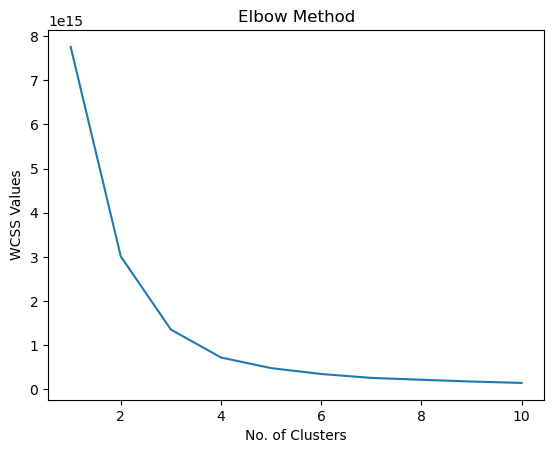

In [87]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [88]:
model = KMeans(n_clusters=3, init='k-means++', random_state=0)
model.fit_predict(X)

array([1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2,

In [89]:
print("Centroids", model.cluster_centers_)

Centroids [[8.81724138e+00 1.00093578e+07 1.48410345e+02]
 [1.31558442e+01 1.62384138e+07 1.24194805e+02]
 [6.23318386e+00 5.92159304e+06 1.30825112e+02]]


In [90]:
centroids = model.cluster_centers_
labels = model.labels_

In [91]:
df_cluster = X.copy()
df_cluster["Cluster"] = model.fit_predict(X)

In [92]:
df_cluster.head()

,NumContracts,Amount_USD,TimeInt,Cluster
0,9,1.362681e+07,22,1
1,9,9.058201e+06,22,0
2,9,8.851087e+06,22,0
3,8,1.055244e+07,25,0
4,8,8.794842e+06,25,0


In [93]:
df_cluster

,NumContracts,Amount_USD,TimeInt,Cluster
0,9,1.362681e+07,22,1
1,9,9.058201e+06,22,0
2,9,8.851087e+06,22,0
3,8,1.055244e+07,25,0
4,8,8.794842e+06,25,0
...,...,...,...,...
585,5,3.855858e+06,24,2
586,4,3.817909e+06,358,2
587,7,8.206839e+06,228,0
588,5,3.367919e+06,325,2


In [94]:
fig = px.scatter_3d(df_cluster, x='NumContracts', y='Amount_USD', z='TimeInt',
              color='Cluster')
fig.show()

## Segmentação por RFM
RFM = Recency, Frequency & Monetary Value

In [95]:
now = customer_final['TradeDate'].max()

In [96]:
RFM_table=customer_final.groupby('CustomerID').agg({'TradeDate': lambda x: (now - x.max()).days, # Recency
                                                'TradeID': lambda x: len(x.unique()), # Frequency
                                                'Amount_USD': lambda x: x.sum()})

RFM_table['TradeDate'] = RFM_table['TradeDate'].astype(int)

RFM_table.rename(columns={'TradeDate': 'recency', 
                         'TradeID': 'frequency',
                         'Amount_USD': 'monetary_value'}, inplace=True)
RFM_table

,recency,frequency,monetary_value
CustomerID,,,
200031,80,9,1.362681e+07
200032,80,9,9.058201e+06
200033,80,9,8.851087e+06
200034,80,8,1.055244e+07
200035,80,8,8.794842e+06
...,...,...,...
600156,80,5,3.855858e+06
600221,96,4,3.817909e+06
600223,96,7,8.206839e+06


In [97]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,82.0,7.0,6.936729e+06
0.50,96.0,8.0,8.873296e+06
0.75,123.0,10.0,1.116640e+07


In [98]:
quantiles = quantiles.to_dict()

In [99]:
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [100]:
#Display the best clients, or the '444's
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
200224,13,15,2.180483e+07,4,4,4,444
200229,15,15,2.079743e+07,4,4,4,444
200228,15,15,2.023706e+07,4,4,4,444
200248,37,15,2.020585e+07,4,4,4,444
200209,2,15,1.959052e+07,4,4,4,444
